<a href="https://colab.research.google.com/github/saffarizadeh/INSY4054/blob/main/Web_Crawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://saffarizadeh.com/Logo.png" width="300px"/>

# *INSY 4054: Emerging Technologies*

# **Web Crawling**

Instructor: Dr. Kambiz Saffarizadeh

---

# Web Crawling in Python

We can user the `requests` library to issue requests to different websites.

To do so, we have to specify the `url` the we want to open. In this example, we use the `get` method to open the url.

In [ ]:
import requests

In [ ]:
url = 'https://www.marquette.edu/'
response = requests.get(url)

We can always use the `dir` function on any object in Python to see what kinds of methods and properties we have access to through the object. For example, here we check in which way we can use `response`.

In [ ]:
dir(response)

## Response Headers

To access the header from the `response` object, we can use `headers`.

In [ ]:
response.headers

{'Date': 'Mon, 08 Mar 2021 16:31:34 GMT', 'Server': 'Apache', 'X-Powered-By': 'PHP/7.2.34', 'Strict-Transport-Security': 'max-age=63072000; includeSubDomains; preload', 'X-Content-Type-Options': 'nosniff', 'Vary': 'Accept-Encoding,User-Agent', 'Content-Encoding': 'gzip', 'Content-Length': '16586', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'text/html; charset=ISO_8859-10'}

Note: `headers` is a special dictionary: it’s made just for HTTP headers. According to RFC 7230, HTTP Header names are case-insensitive.

So, we can access the headers using any capitalization we want:

In [ ]:
response.headers['Content-Type']

'text/html; charset=ISO_8859-10'

Note that we can also use the `get` method to do the same thing. The difference between using square brackets and using the `get` method is that if what we are looking for does not exist inside headers, we get an error with square brackets but not with the `get` method.

In [ ]:
response.headers.get('content-type')

'text/html; charset=ISO_8859-10'

## Cookies

Some websites use cookies, that is create some files on your device to store some temporary information. To learn more about cookies visit https://www.allaboutcookies.org/cookies/.

We can access the cookies created by a website after we open it using `cookies,get_dict()` method. Note that some websites don't use cookies unless you are logged in.

In [ ]:
response.cookies.get_dict()

{}

Websites often use their own stored cookies in next interactions to make sure you continue your interaction from where you left off.

Using `requests` you can send websites your own custom cookies. To send your own cookies to the server, you can use the cookies parameter:

In [ ]:
url = 'https://httpbin.org/cookies'

cookies = {'cookies_are': 'working'}

response = requests.get(url, cookies=cookies)

print(response.text)

{
  "cookies": {
    "cookies_are": "working"
  }
}



## Custom Headers

If you’d like to add HTTP headers to a request, simply pass in a `dict` to the `headers` parameter.

This is often useful when a website only opens on specific devices or browsers. This way you can mimic those devices or browsers (to some extent).

In [ ]:
url = 'https://api.github.com/some/endpoint'
headers = {'user-agent': 'my-app/0.0.1'}
response = requests.get(url, headers=headers)

## Timeouts

You can tell `requests` to stop waiting for a response after a given number of seconds with the `timeout` parameter.

Nearly all production code should use this parameter in nearly all requests. Failure to do so can cause your program to hang indefinitely.

Note that `timeout` is not a time limit on the entire response download; rather, an exception is raised if the server has not issued a response for timeout seconds (more precisely, if no bytes have been received on the underlying socket for timeout seconds). If no timeout is specified explicitly, requests do not time out.

In [ ]:
requests.get('https://github.com/', timeout=0.1)

<Response [200]>

## Response Status Codes

When you issue a request, the response will have a status. This status shows whether the request was successful (200), page not found (404), there was a server error (500), etc.

These status codes can help you automized the process of crawling much more efficiently.

In [ ]:
url = 'https://www.marquette.edu/dsakjhdasiudasjk'
response = requests.get(url)

In [ ]:
response.status_code

404

In [ ]:
requests.codes.ok

200

In [ ]:
response.status_code == requests.codes.ok

False

The `get` method does not raise an exception (error) when the request was unsuccessful. It is up to you to check the status and decide how the program should proceed based on the status.

But sometimes, you might want to intentionally raise an exception (error) if the `get` method was unsuccessful. To do so, you can simply call `raise_for_status` method on the response object.

In [ ]:
# response.raise_for_status()

## Text and Binary Responses

To access the crawled page content, you have two main methods: `text` and `content`.

The difference between these two methods is that `text` returns a string (str) but `content` returns `bytes`. The advantage of working with `bytes` is that they are not limited to texts, that is, we can also access an image or a video if the url is directly referring to one.

Warning: It is strongly recommended that you open files in binary mode.

In [ ]:
url = 'https://www.marquette.edu/'

print(type(response.text)) # returns text content
print(type(response.content)) # works for text and any other content type such as image

<class 'str'>
<class 'bytes'>


## JSON Response

In some cases, we might want to retrieve json data from a url. To do so, we don't need to do anything special in `get`. After `getting` the url, you can use `json` method to get the response as a list of dictionaries. 

In [ ]:
response = requests.get('https://api.github.com/events')

In [ ]:
json_resp = response.json()

In [ ]:
print(type(json_resp))
print(type(json_resp[0]))
print(json_resp)

## POST requests

Sometimes, you want to send some form-encoded data — much like an HTML form. To do this, simply pass a dictionary to the data argument. Your dictionary of `data` will automatically be form-encoded when the request is made:

In [ ]:
payload = {'key1': 'value1', 'key2': 'value2'}

In [ ]:
response = requests.post("https://httpbin.org/post", data=payload)

In [ ]:
print(response.text)

# OR print(response.json())

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "key1": "value1", 
    "key2": "value2"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "23", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.23.0", 
    "X-Amzn-Trace-Id": "Root=1-60465168-277a941274853219502b47ce"
  }, 
  "json": null, 
  "origin": "34.105.42.245", 
  "url": "https://httpbin.org/post"
}



There are times that you may want to send data that is not form-encoded. If you pass in a `string` instead of a `dict`, that data will be posted directly.

In [ ]:
import json

In [ ]:
payload = {'key1': 'value1', 'key2': 'value2'}

In [ ]:
json.dumps(payload) # to convert the dictonary to string

'{"key1": "value1", "key2": "value2"}'

In [ ]:
response = requests.post('https://httpbin.org/post', data=json.dumps(payload))

In [ ]:
print(response.text)

{
  "args": {}, 
  "data": "{\"key1\": \"value1\", \"key2\": \"value2\"}", 
  "files": {}, 
  "form": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "36", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.23.0", 
    "X-Amzn-Trace-Id": "Root=1-60465168-54c36eeb585570f278c6b9e0"
  }, 
  "json": {
    "key1": "value1", 
    "key2": "value2"
  }, 
  "origin": "34.105.42.245", 
  "url": "https://httpbin.org/post"
}



# Accessing Page Elements

We typically want to extract some specific information from a page after dowloading it. We have many different ways to approach this problem. The common ways are XPath, BeautifulSoup, and Regular Expressions. Here we have two simple examples of using XPath and BeautifulSoup.

## Using XPath

Learn more about XPath: https://www.w3schools.com/xml/xpath_intro.asp

`lxml` is one of the most powerful Python libraries when it comes to working with XML and XML-like formats. This library have a sublibrary for working with HTML.

In [ ]:
import requests
from lxml import html

In [ ]:
url = 'https://www.marquette.edu/'
response = requests.get(url)

In [ ]:
tree = html.fromstring(response.content) # Note that we use .content not .text

Get the text inside an element

In [ ]:
link_labels = tree.xpath('//a/text()')
link_labels

Get an attribute inside an element

In [ ]:
link_urls = tree.xpath('//a/@href')
link_urls

## Using BeautifulSoup
 
Learn more about BeautifulSoup: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

BeautifulSoup is typically considered to be much simpler that XPath. While with XPath you can achieve a lot by just writing a short line of code, writing that line of code is often very challenging if you don't understand XPath rules well. But with BeautifulSoup your code is typically longer but much more Pytonic (therefore, much easier to understand and modify).

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(response.content, 'lxml')

In [ ]:
all_links = soup.find_all('a')
all_links

Get the text inside an element

In [ ]:
link_labels = []
for link in all_links:
  link_labels.append(link.text)

In [ ]:
link_labels

Get an attribute inside an element

In [ ]:
link_urls = []
for link in all_links:
  link_urls.append(link.get('href'))

In [ ]:
link_urls

Combine links and labels using zip (for more information see: https://docs.python.org/3/library/functions.html#zip)

In [ ]:
label_url_pairs = list(zip(link_labels, link_urls))

In [ ]:
label_url_pairs

In [ ]:
cleaned_label_url_pairs = []

for label, url in label_url_pairs:
    if url[:4] == "http":
        cleaned_label_url_pairs.append((label, url))

In [ ]:
cleaned_label_url_pairs

## Download all images

In [ ]:
# With XPath
image_urls = tree.xpath('//img/@src')
image_urls

In [ ]:
# With BeautifulSoup
image_urls = [image.get('src') for image in soup.find_all('img')]
image_urls

Some images have a full URL but many don't. Even worse, some of the ones that don't have a full URL start with a `/` and some don't.

Fortunately, we can fix this problem with little effort using the `urljoin` method from `requests.compat`.

In [ ]:
BASE_URL = "https://www.marquette.edu"

fixed_image_urls = [requests.compat.urljoin(BASE_URL, image_url) for image_url in image_urls]

In [ ]:
fixed_image_urls

## How can we leverage alt text of the images as possible labels for supervised machine learning 

In [ ]:
# With XPath
image_alts = tree.xpath('//img/@alt')
image_alts

In [ ]:
# With BeautifulSoup
image_alts = [img.get('alt') for img in soup.find_all('img')]
image_alts

In [ ]:
image_alt_pairs = list(zip(fixed_image_urls, image_alts))

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(image_alt_pairs, columns={"image_url", "image_alt"})
df

,image_url,image_alt
0,https://www.marquette.edu/_global-images/marqu...,Marquette University logo
1,https://www.marquette.edu/_resources/images/my...,My Marquette
2,https://www.marquette.edu/_resources/images/st...,Community Service
3,https://www.marquette.edu/_resources/images/st...,Student looking through archives
4,https://www.marquette.edu/innovation/images/di...,Cover of DISCOVER research
5,https://www.marquette.edu/_resources/images/me...,Men's basketball
6,https://www.marquette.edu/_resources/images/th...,Alumni with students
7,https://www.marquette.edu/_images/students-cam...,
8,https://www.marquette.edu/_images/undergraduat...,"A student at a desk wearing headphones, wrtiti..."
9,https://www.marquette.edu/_images/graduate-car...,A group of older students sitting around a tab...


## Download Images

To dowload all images, we first need to create a directory to keep the downloaded images. To do so, we use the `os` library, which gives us the needed tools to, among other things, create directories and manipulate the file paths in a way that is compatible with our operating system.

In [ ]:
import os

In [ ]:
directory = "images"
os.makedirs(directory, exist_ok=True) # With exist_ok=True, we will not get an error if the directory already exists

Go through image urls and download them one by one.

Use a unique id starting from 0 as file name to avoid duplicate names.

In [ ]:
image_counter = 0
for url in fixed_image_urls:
  image_extension = url.split(".")[-1]                      # Split the url based on the dots in the string and grab the last part which basically shows the extension of the file
  image_name = str(image_counter) + "." + image_extension   # Create an name with the proper extension to be used when we save the image
  image_address = os.path.join(directory, image_name)       # Add the folder name to the image name
  image_response = requests.get(url)
  if image_response.status_code == 200:
    with open(image_address, "wb") as f:                    # This is how we can save a file with a specific name to save the downloaded image
      f.write(image_response.content)
  image_counter = image_counter + 1

## Modifying images with TensorFlow

https://www.tensorflow.org/api_docs/python/tf/image

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

It is possible to use some tensorflow tools to directly load all images.

It is also possible to read/write and modify the images using other libraries such as `imageio` and Pillow (`PLT`).

But here we see how to do this manually using `tensorflow` to have more control over the process and preprocess the images the way we want. Furthermore, this can add to our growing knowledge of `tensorflow`.

In [ ]:
image_names = []
images_list = []
# We use the following nested loops to get all files inside a directory, one by one
for subdir, dirs, files in os.walk(os.path.join(os.getcwd(), directory)):
  for filename in sorted(files):
    filename = filename.lower()
    if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
      image_path = os.path.join(subdir, filename)
      image_d = tf.keras.preprocessing.image.load_img(image_path)
      image_array = tf.keras.preprocessing.image.img_to_array(image_d) / 255.0
      image_array = tf.image.resize_with_pad(image_array, 299,299, antialias=True)
      images_list.append(image_array)
      image_names.append(filename)
image_arrays = np.array(images_list)

In [ ]:
image_arrays.shape

(25, 299, 299, 3)

We load the Inception V3 model from TensorFlow Hub. We add a Softmax layer to the end of the model to make sure the model gives us probabilities instead of apparently meaningless numbers (logits).

In [ ]:
inception_model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/classification/4", output_shape=[1001]),
    tf.keras.layers.Softmax()
])
inception_model.build([None, 299, 299, 3])  # Batch input shape.

We can pass all image arrays direcly to the model and get all predications at once.

In [ ]:
output = inception_model(image_arrays)

The model gives is 25 predictions:

In [ ]:
output.shape

TensorShape([25, 1001])

To make sense of these predications, we need to have the class names:

In [ ]:
# This is could be done in a single line, but here we expand it for readability
classes_response = requests.get('https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
classes_text = classes_response.text
classes = classes_text.split('\n')

Now, we can check how well the model performed

In [ ]:
num = 20

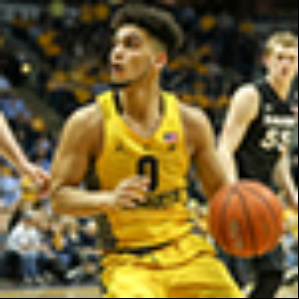

In [ ]:
# Show an image from the image_arrays
tf.keras.preprocessing.image.array_to_img(image_arrays[num])

Get top 5 classes and their probabilities.

To do so, we use the `argsort` method of `numpy` to sort the result of this specific predictation. Since `argsort` sorts the numbers in ascending order, we multiply the result by -1 to make them negative so that the largest number becomes the smallest number (most negative number). This way the ascending order really represents a descending order.

`np.argsort` gives us the indecies of the values in `result` sorted in descending order. We convert these indecies into a list and loop through them. In each iteration of the loop we grap the index and use it to extract the acual value associated with this index from the `result`. Because of the `Softmax` layer in our model, the values in `result` are between 0 and 1, representing probabilities. So, we can multiply them by 100 and round them using 2 decimal points to make them more readbale.

We can also use the index in each interation to extract the class name from the `classes` list we downloaded earlier.

In [ ]:
result = output[num]
top_labels = [(classes[index], round(result[index].numpy()*100, 2)) for index in list(np.argsort(-1*result))]
print(top_labels[:5])

[('basketball', 99.98), ('maillot', 0.0), ('muzzle', 0.0), ('clog', 0.0), ('affenpinscher', 0.0)]


To create a table with image name, label, and the model's confidence in the accuracy of the label, we can go through all images and create a list of labels and confidences. Next, we can put these lists together in a `pandas.DataFrame`.

In [ ]:
labels = []
confidences = []
for i in range(len(image_names)):
  result = output[i]
  max_index = np.argmax(result)
  label = classes[max_index]
  confidence = result[max_index].numpy()
  labels.append(label)
  confidences.append(confidence)

Put everything in a `DataFrame`.

In [ ]:
df_final = pd.DataFrame({"image": image_names, "label": labels, "confidence": confidences})
df_final

,image,label,confidence
0,1.jpg,car mirror,0.194479
1,10.jpg,monitor,0.694435
2,11.jpg,groom,0.786518
3,12.jpg,television,0.478036
4,13.jpg,groom,0.566393
5,14.jpg,jersey,0.350529
6,15.jpg,bulletproof vest,0.612233
7,16.jpg,cinema,0.190617
8,17.jpg,spotlight,0.099262
9,18.jpg,bonnet,0.367703


Finally, we export the results into an Excel file.

In [ ]:
df_final.to_excel("classified_images.xlsx")